In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statistics import mode
import statistics 
%matplotlib inline

# Advertisment Engagement Impact

Advertising on social media is increasingly important. Studying the potential for an ad campaign to receive clicks is vital for companies,especially within the context of demographic data. The data set below shows the engagement level marked as measured with the click response. The data also shows gender, age, geographic location and daily internet usage. This kind of data can help advertisers create more targeted and effective ad campaigns. 


Problem:

How to target ads to increase engagement levels? So far, engagement with ads is at 50% level, disregarding demographic data. 
In order to ensure that ads are effective, the demographic data of the audience needs to analysed. 


Research Question: 
How do different demographic groups and internet usage impact advertisement engagement?

# Advertisment Engagement Data

In [88]:
ad = pd.read_csv(r'C:\Users\zalth\Downloads\ADS\advertisement\advertising.csv')
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [78]:
ad.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [195]:
ad['Dates'] = pd.to_datetime(ad['Timestamp']).dt.date
ad['Time'] = pd.to_datetime(ad['Timestamp']).dt.time
ad.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked_on_Ad,Age_Group,Dates,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,30-39,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,30-39,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,19-29,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,19-29,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,30-39,2016-06-03,03:36:18


In [200]:
ad.rename(columns={'Clicked on Ad':'Clicked_on_Ad','Daily Internet Usage':'Daily_Internet_Usage','Daily Time Spent on Site':'Daily_Time_Spent_on_Site','Area Income':'Area_Income'},inplace=True)
ad.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked_on_Ad,Age_Group,Dates,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,30-39,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,30-39,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,19-29,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,19-29,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,30-39,2016-06-03,03:36:18


In [34]:
print ('Males', len (ad [ad.Male == 1]))
print ('Females', len (ad [ad.Male == 0]))

Males 481
Females 519


In [39]:
print ('Number of people who clicked on ad:', len (ad [ad.Clicked_on_Ad==1]))
print ('Number of people who did not click on ad:', len (ad [ad.Clicked_on_Ad==0]))

Number of people who clicked on ad: 500
Number of people who did not click on ad: 500


In [17]:
print ('Males AVG Age is:', (ad [ad.Male == 1].Age.mean()))
print ('Females AVG Age is:',(ad [ad.Male == 0].Age.mean()))

Males AVG Age is: 35.817047817047815
Females AVG Age is: 36.1868978805395


In [71]:
#Choose one variable and plot that variable four different ways.

In [72]:
#Choose two continuous variables, and plot them three different ways.

In [73]:
#Choose one continuous variable and one categorical variable, and plot them six different ways.

In [75]:
#Create one master plot that gives insight into the variables and their interrelationships, including:
#Probability distributions
#Bivariate relationships
#Whether the distributions or the relationships vary across groups
#Accompany your plot with a written description of what you see.

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
Choose one variable and plot that variable four different ways.
Choose two continuous variables, and plot them three different ways.
Choose one continuous variable and one categorical variable, and plot them six different ways.
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups
Accompany your plot with a written description of what you see.

In [129]:
#binning
bins = [0,29,39,49,100]
group_names=['19-29','30-39','40-49','50+']
ad['Age_Group'] = pd.cut(ad['Age'],bins,labels=group_names)
ad.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily_Internet_Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked_on_Ad,Age_Group
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,30-39
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,30-39
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,19-29
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,19-29
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,30-39


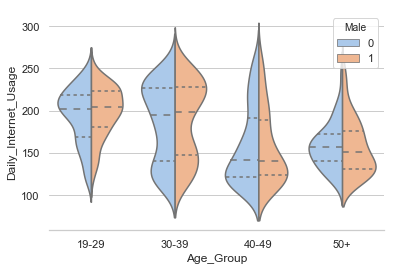

In [204]:
sns.set(style='whitegrid', palette='pastel',color_codes=True)
ax=sns.violinplot(x=ad.Age_Group,y='Daily_Internet_Usage',hue='Male',split=True, inner='quart',data=ad,scale='count')
sns.despine(left=True)

Text(0.5, 1.0, 'Total_Clicked_on_ Ad')

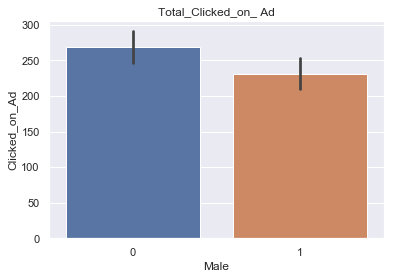

In [117]:
sns.set(style='darkgrid')
ax = sns.barplot(x="Male", y="Clicked_on_Ad", data=ad, estimator=sum)
plt.title('Total_Clicked_on_ Ad')

Text(0.5, 1.0, 'Clicked on Ad by AVG Income')

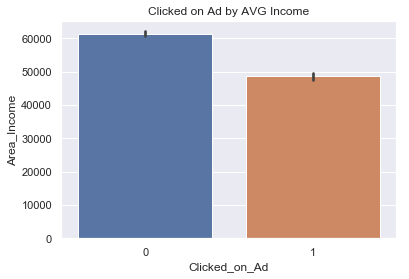

In [166]:
sns.set(style='darkgrid')
ax = sns.barplot(x="Clicked_on_Ad", y="Area_Income", data=ad)
plt.title('Clicked on Ad by AVG Income')

Text(0.5, 1.0, 'Total_Clicked_on_ Ad')

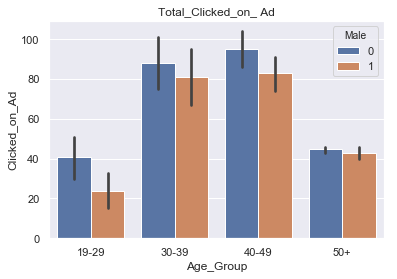

In [131]:
sns.set(style='darkgrid')
ax = sns.barplot(x=ad.Age_Group, y="Clicked_on_Ad", hue="Male", data=ad, estimator=sum)
plt.title('Total_Clicked_on_ Ad')

Text(0.5, 1.0, 'AVG Daily Time Spent on Site in Minutes')

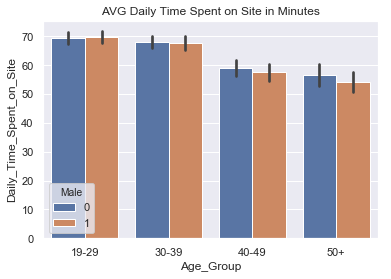

In [160]:
sns.set(style='darkgrid')
ax = sns.barplot(x=ad.Age_Group, y="Daily_Time_Spent_on_Site", hue="Male", data=ad)
plt.title('AVG Daily Time Spent on Site in Minutes')

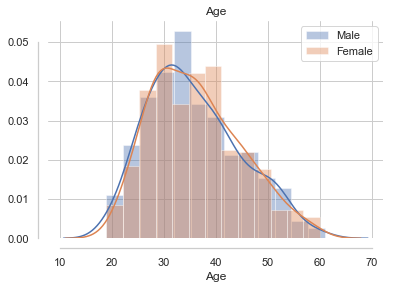

In [121]:
sns.set(style='whitegrid')
x= ad[ad.Male == 1].Age
y= ad[ad.Male == 0].Age
sns.distplot(x, label='Male')
sns.distplot(y, label='Female');
plt.title('Age')
plt.legend()
sns.despine(offset=10, trim=True)

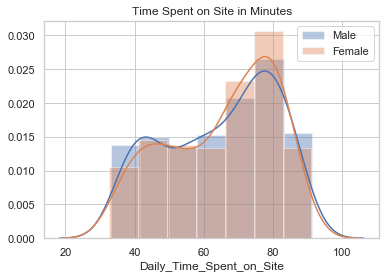

In [216]:
sns.set(style='whitegrid')
z= ad[ad.Male==1].Daily_Time_Spent_on_Site
w= ad[ad.Male==0].Daily_Time_Spent_on_Site
sns.distplot(z, label='Male',bins=7)
sns.distplot(w,label='Female',bins=7)
plt.title('Time Spent on Site in Minutes')
plt.legend()

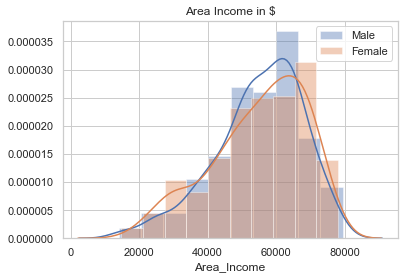

In [214]:
z= ad[ad.Male==1].Area_Income
w= ad[ad.Male==0].Area_Income
sns.distplot(z, label='Male',bins=10)
sns.distplot(w,label='Female',bins=10)
plt.title('Area Income in $')
plt.legend()

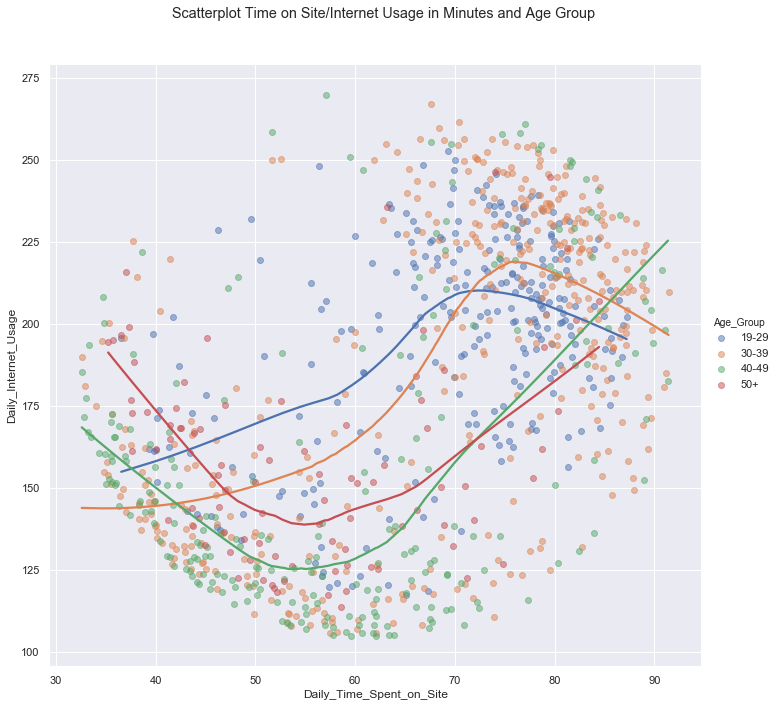

In [158]:
g = sns.lmplot(y='Daily_Internet_Usage', 
               x='Daily_Time_Spent_on_Site',
               hue='Age_Group', data=ad, fit_reg=True, ci=False, scatter_kws={'alpha':0.5}, lowess=True,height=10) 
g.set_ylabels("Daily_Internet_Usage")
g.set_xlabels("Daily_Time_Spent_on_Site")
plt.suptitle('Scatterplot Time on Site/Internet Usage in Minutes and Age Group')
plt.subplots_adjust(top=0.9)
plt.show()

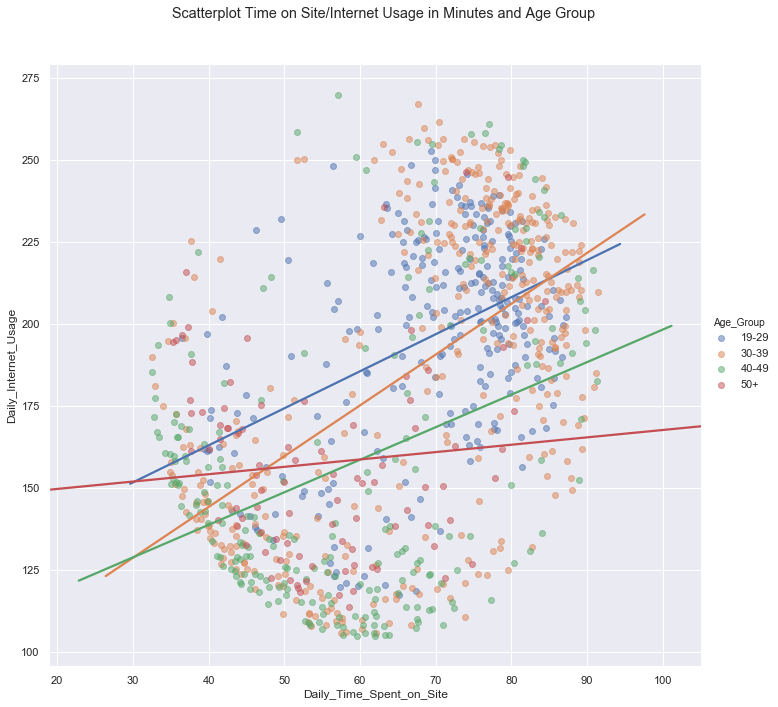

In [208]:
g = sns.lmplot(y='Daily_Internet_Usage', 
               x='Daily_Time_Spent_on_Site',
               hue='Age_Group',
               data=ad, 
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.5}, 
              height=10) 
g.set_ylabels("Daily_Internet_Usage")
g.set_xlabels("Daily_Time_Spent_on_Site")
plt.suptitle('Scatterplot Time on Site/Internet Usage in Minutes and Age Group')
plt.subplots_adjust(top=0.9)
plt.show()

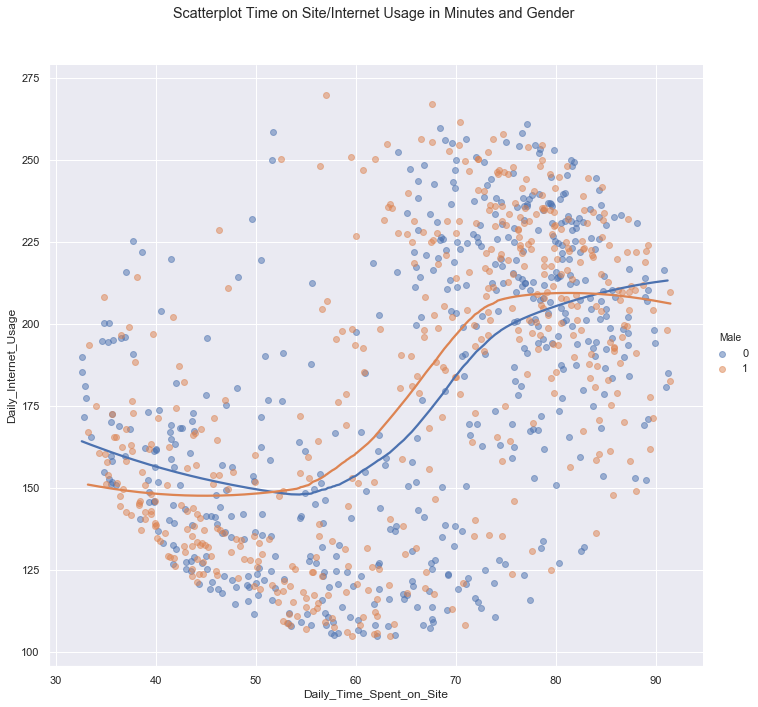

In [156]:
g = sns.lmplot(y='Daily_Internet_Usage', 
               x='Daily_Time_Spent_on_Site',
               hue='Male',
               data=ad, 
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.5}, 
               lowess=True,
              height=10) 
g.set_ylabels("Daily_Internet_Usage")
g.set_xlabels("Daily_Time_Spent_on_Site")
plt.suptitle('Scatterplot Time on Site/Internet Usage in Minutes and Gender')
plt.subplots_adjust(top=0.9)
plt.show()

Text(0.5, 1.0, 'Time on Site/Internet Usage in Minutes')

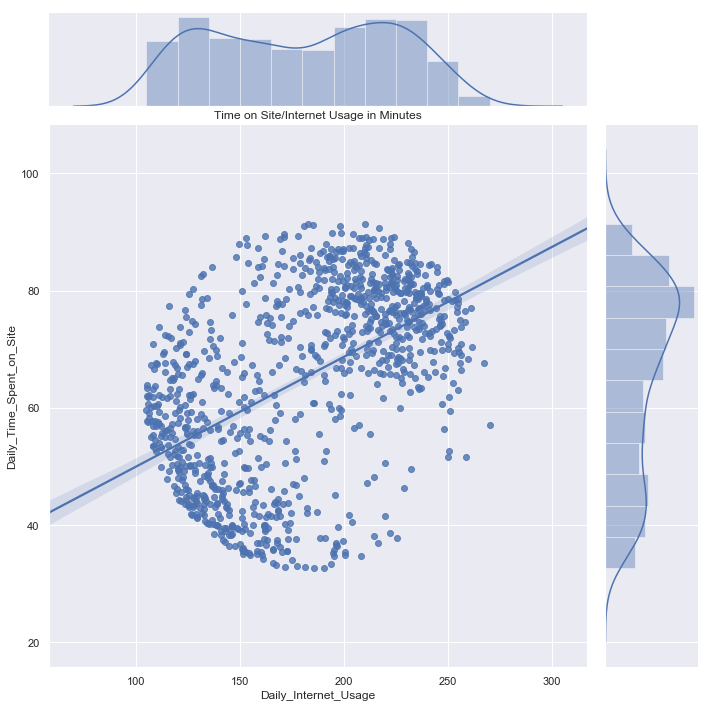

In [157]:
sns.jointplot("Daily_Internet_Usage","Daily_Time_Spent_on_Site",data=ad, kind="reg",
                  color="b", height=10)
plt.title('Time on Site/Internet Usage in Minutes')

Text(0.5, 1.0, 'Area Income impact on Time Spent on Site')

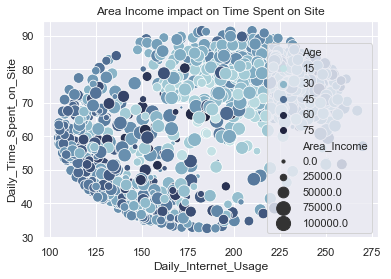

In [184]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Daily_Internet_Usage", y="Daily_Time_Spent_on_Site",
                     hue="Age", size="Area_Income",
                     palette=cmap, sizes=(10, 200),
                     data=ad)
plt.title('Area Income impact on Time Spent on Site')

Text(0.5, 1.0, 'Total_Clicked_on_ Ad')

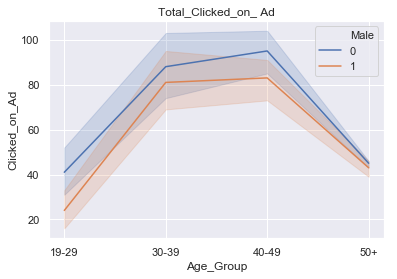

In [205]:
sns.set(style='darkgrid')
ax = sns.lineplot(x=ad.Age_Group, y="Clicked_on_Ad", hue="Male", data=ad, estimator=sum)
plt.title('Total_Clicked_on_ Ad')


# Method Design

In [ ]:
#Analysis that highlights your experimental hypothesis.
#A rollout plan showing how you would implement and rollout the experiment
#An evaluation plan showing what constitutes success in this experiment

### Hypothesis: 

Differences in gender, age, daily internet usage and geographic location have an impact on engagement level with ads.

### Rollout Plan:

Run the same ad with exact same content and formatting, during the same time of the week and the day to demographic groups (gender and age group). This is an A/B manipulation where the context and the sample do not change.
 

### Evaluation Plan:

Primary Variable: Number of Clicks

Secondary Variable: Time spent on the website


The statistical test that can help with categorical outcomes (Number of Clicks) is a chi-square test of independence. 


If the number of individuals surveyed show a difference in level of engagement (number of clicks) based on their demographic data, then demographic data does impact the level of engagment of certain ads. If the number of clicks is more or less the same, then demographic data has not impact on the lvel of engagement. 